In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import yfinance as yf
import streamlit as st
from datetime import date

In [8]:
stock = pd.read_csv('BBCA.JK.csv',  index_col=0)

df_stock = stock
df_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-06-08,175.0,180.0,175.0,177.5,103.276207,499150000
2004-06-09,177.5,182.5,175.0,180.0,104.730820,294290000
2004-06-10,180.0,180.0,177.5,180.0,104.730820,165590000
2004-06-11,177.5,180.0,177.5,180.0,104.730820,135830000
2004-06-14,180.0,180.0,175.0,177.5,103.276207,158540000


In [9]:
stock.drop(columns = ['Volume'], inplace = True)

In [10]:
def create_train_test_set(data):
    
    features = data.drop(columns=['Close'], axis=1)
    target = data['Close']
    

    data_len = data.shape[0]
    print("Stock Data length: ",str(data_len))

    train_size = int(data_len * 0.7)
    print("Training Set length: ",str(train_size))

    test_size = int(data_len * 0.3)
    test_index = train_size + test_size
    print("Test Set length: ",str(test_size))

    X_train, X_test = features[:train_size], features[train_size:test_index]
    y_train, y_test = target[:train_size], target[train_size:test_index]

    print(X_train.shape, X_test.shape)
    print(y_train.shape, y_test.shape)
    
    return X_train, X_test, y_train, y_test

In [11]:
X_train, X_test, y_train, y_test = create_train_test_set(df_stock)

Stock Data length:  4938
Training Set length:  3456
Test Set length:  1481
(3456, 4) (1481, 4)
(3456,) (1481,)


In [12]:
from xgboost import XGBRegressor

model = XGBRegressor(objective="reg:squarederror", n_estimators=1000)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [13]:
prediction = model.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print('R2_score:', r2_score(y_test, prediction))
print('Mean Absolute Error:', mean_absolute_error(y_test, prediction))
print('Mean Squared Error::', mean_squared_error(y_test, prediction))
print('Root Mean Squared Error(RMSE):', np.sqrt(mean_squared_error(y_test, prediction)))

R2_score: -2.0328150808235628
Mean Absolute Error: 2197.330869397789
Mean Squared Error:: 7076487.199117253
Root Mean Squared Error(RMSE): 2660.1667615240312


In [15]:
errors = abs(prediction - y_test)

print('Mean Absolute Error using XgBoost:', round(np.mean(errors), 2), 'degrees.')

mape = 100 * (errors / y_test)

accuracyXGB = 100 - np.mean(mape)
print('Accuracy XGBoost:', round(accuracyXGB, 2), '%.')

Mean Absolute Error using XgBoost: 2197.33 degrees.
Accuracy XGBoost: 71.85 %.


In [16]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':prediction})
df

,Actual,Predicted
Date,,
2018-05-21,4330.0,4300.100098
2018-05-22,4400.0,4412.559082
2018-05-23,4400.0,4434.008301
2018-05-24,4490.0,4514.813965
2018-05-25,4510.0,4549.260254
...,...,...
2024-05-17,9750.0,4811.896973
2024-05-20,9475.0,4811.896973
2024-05-21,9375.0,4811.896973


<Axes: xlabel='Date'>

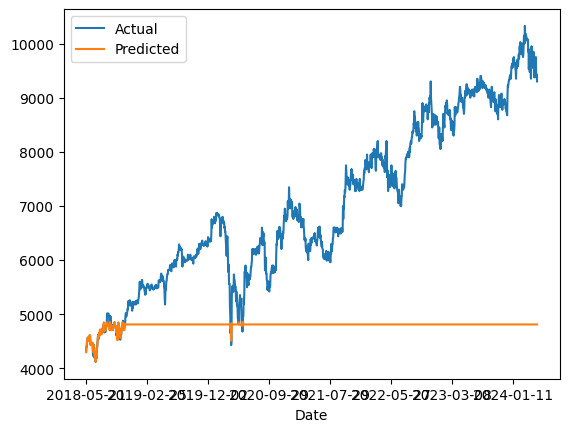

In [17]:
df[['Actual', 'Predicted']].plot()